# Isotropic smoothing of image via Heat equation

## import library

In [26]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from skimage import color
from skimage import io

## load input image
- filename for the input image is 'barbara_color.jpeg'

In [27]:
 
I0 = io.imread('barbara_color.jpeg') # 처음 이미지

## check the size of the input image

In [28]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.shape[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  512
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image

In [29]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
I = color.rgb2gray(I0) # 흑백으로 변환

num_row     = I.shape[0]
num_column  = I.shape[1]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  512
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [30]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
I = (I - np.min(I)) / (np.max(I) - np.min(I)) #흑백 사진을 기준으로
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [50]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    D = np.pad(I, [1, 1], 'edge')
    D = np.roll(D, -1, axis = 0) - D
    D = D[1:I.shape[0]+1,1:I.shape[1]+1]
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [51]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    D = np.pad(I, [1, 1], 'edge')
    D = D - np.roll(D, 1, axis = 0) 
    D = D[1:I.shape[0] + 1, 1:I.shape[1] + 1] #원래 모양으로 
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [53]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    D = np.pad(I, [1, 1], 'edge')
    D = np.roll(D, -1, axis = 1) - D # colunm
    D = D[1:I.shape[0] + 1,1:I.shape[1] + 1] 
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [54]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    D = np.pad(I, [1, 1], 'edge')
    D = D - np.roll(D, 1, axis = 1) # column
    D = D[1:I.shape[0] + 1,1:I.shape[1] + 1]  
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the laplacian of input matrix
- $\Delta I = \nabla^2 I = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2}$
- $\Delta I = I[x+1, y] + I[x-1, y] + I[x, y+1] + I[x, y-1] - 4 * I[x, y]$
- $\Delta I$ = derivative_x_forward - derivative_x_backward + derivative_y_forward - derivative_y_backward

In [55]:
def compute_laplace(I):
    
    laplace = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    laplace = compute_derivative_x_forward(I) - compute_derivative_x_backward(I) + compute_derivative_y_forward(I) - compute_derivative_y_backward(I)
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return laplace

## define a function to compute the heat equation of data $I$ with a time step
- $I = I + \delta t * \Delta I$

In [56]:
def heat_equation(I, time_step):
    
    I_update = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    I_update = I + time_step * compute_laplace(I) # 수식 그대로, 델타t = time_step

    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return I_update

## run the heat equation over iterations

In [57]:
def run_heat_equation(I, time_step, number_iteration):

    I_update = np.zeros(I.shape)

    for t in range(number_iteration):
        # ++++++++++++++++++++++++++++++++++++++++++++++++++
        # complete the blanks
        #
        I_update = heat_equation(I, time_step) 
        I = I_update
    
        #
        # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return I_update

___

___

## functions for presenting the results

___

___

In [38]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [39]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [40]:
def function_result_03():

    L = compute_laplace(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(L, cmap='gray')
    plt.show()

In [41]:
def function_result_04():

    time_step   = 0.25
    I_update    = heat_equation(I, time_step)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [42]:
def function_result_05():

    time_step           = 0.25
    number_iteration    = 128

    I_update = run_heat_equation(I, time_step, number_iteration)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [43]:
def function_result_06():

    time_step           = 0.25
    number_iteration    = 512

    I_update = run_heat_equation(I, time_step, number_iteration)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [44]:
def function_result_07():

    L = compute_laplace(I)

    value1 = L[0, 0]    
    value2 = L[-1, -1]    
    value3 = L[100, 100]    
    value4 = L[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [45]:
def function_result_08():

    time_step   = 0.25
    I_update    = heat_equation(I, time_step)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [46]:
def function_result_09():

    time_step           = 0.25
    number_iteration    = 128

    I_update = run_heat_equation(I, time_step, number_iteration)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [47]:
def function_result_10():

    time_step           = 0.25
    number_iteration    = 512

    I_update = run_heat_equation(I, time_step, number_iteration)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


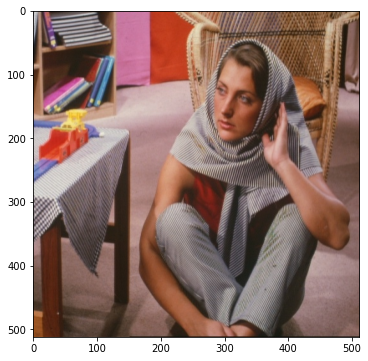

**************************************************
## [RESULT 02]
**************************************************


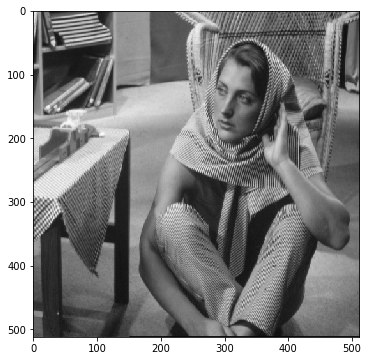

**************************************************
## [RESULT 03]
**************************************************


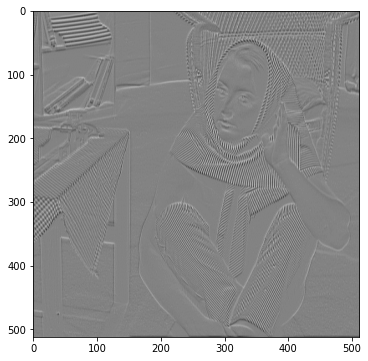

**************************************************
## [RESULT 04]
**************************************************


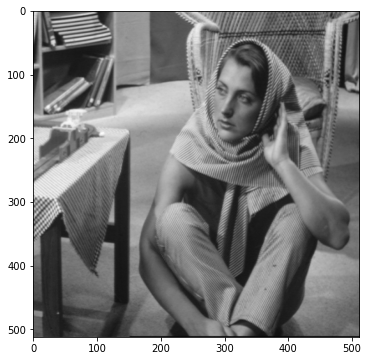

**************************************************
## [RESULT 05]
**************************************************


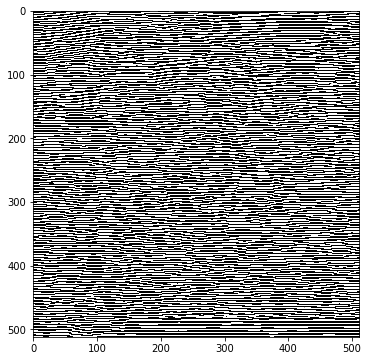

**************************************************
## [RESULT 06]
**************************************************


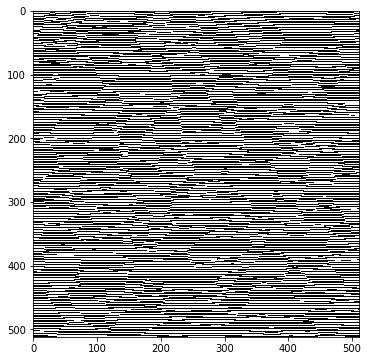

**************************************************
## [RESULT 07]
**************************************************
value1 =  0.38873832902073646
value2 =  -0.36810045531967606
value3 =  -0.27006933448395126
value4 =  -0.0031499935854835126
**************************************************
## [RESULT 08]
**************************************************
value1 =  0.11620040458063048
value2 =  -0.02212508706207611
value3 =  0.4720358165279667
value4 =  0.606730669777596
**************************************************
## [RESULT 09]
**************************************************
value1 =  1907.436454981893
value2 =  -951.9896010270569
value3 =  -1440.3286025580671
value4 =  1016.434802067488
**************************************************
## [RESULT 10]
**************************************************
value1 =  2.5143487514701595e+20
value2 =  -1.7094708155278465e+20
value3 =  6.247529604236744e+21
value4 =  -2.4273446945883365e+21


In [48]:
number_result = 10

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)